In [58]:
# ANN Building and Visualization Imports
import keras
from keras import backend as K
from keras import optimizers, losses
from keras.engine.topology import Layer
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import tensorflow as tf
from keras.callbacks import LambdaCallback
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.utils import shuffle




# Standard Imports
import pandas as pd
import numpy as np
import math

# Initializations
RF_size = 2
stride = 2

In [59]:
inputs = pd.read_csv('binary_shapes.csv')
inputs = inputs.drop('X1', axis = 0) # Taking out col names
inputs = inputs.apply(pd.to_numeric)  # converting to floats

inputs = inputs.values # convert to np ndarray
inputs = inputs.reshape(955, 50, 50, 1)
flattened_inputs = inputs.reshape(955, 2500)

In [60]:
labels = pd.read_csv('binary_shapes_labels.csv')
labels = labels.drop('x', axis = 0)
labels = labels.apply(pd.to_numeric)
labels = labels.values
labels = to_categorical(labels)

In [61]:
inputs, labels = shuffle(inputs, labels)

In [62]:
model = Sequential()
model.add(Conv2D(input_shape = (50,50,1), filters=52, kernel_size = RF_size, strides = stride, activation = 'relu'))
model.add(Flatten())
model.add(Dense(96, activation = 'relu'))
model.add(Dense(39, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 25, 25, 52)        260       
_________________________________________________________________
flatten_90 (Flatten)         (None, 32500)             0         
_________________________________________________________________
dense_179 (Dense)            (None, 96)                3120096   
_________________________________________________________________
dense_180 (Dense)            (None, 39)                3783      
Total params: 3,124,139
Trainable params: 3,124,139
Non-trainable params: 0
_________________________________________________________________


In [56]:
def run_mod():
    model = Sequential()
    model.add(Conv2D(input_shape = (50,50,1), filters=52, kernel_size = RF_size, strides = stride, activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(96, activation = 'relu'))
    model.add(Dense(39, activation = 'softmax'))
    model.compile(optimizer = optimizers.adam(lr = 0.0005), loss = 'categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x = inputs, validation_split = 0.25, y = labels, batch_size = 50, epochs = 25)
    return(history)

In [57]:
val_acc5 = np.zeros(10)
val_acc25 = np.zeros(10)
val_loss5 = np.zeros(10)
val_loss25 = np.zeros(10)
for i in range(10):
        results = run_mod()
        val_acc5[i] = results.history['val_acc'][4]
        val_acc25[i] = results.history['val_acc'][24]
        val_loss5[i] = results.history['val_loss'][4]
        val_loss25[i] = results.history['val_loss'][24]
        
print("acc15 = " + str(np.mean(val_acc5)), "\n",
      "acc100 = " + str(np.mean(val_acc25)), "\n",
      "loss15 = " + str(np.mean(val_loss5)), "\n",
     "loss100 = " + str(np.mean(val_loss25)))

Train on 716 samples, validate on 239 samples
Epoch 1/25
716/716 [==============================] - 5s 7ms/step - loss: 3.4929 - acc: 0.1089 - val_loss: 3.2571 - val_acc: 0.1339
Epoch 2/25
716/716 [==============================] - 1s 1ms/step - loss: 2.9120 - acc: 0.3115 - val_loss: 2.7515 - val_acc: 0.3096
Epoch 3/25
716/716 [==============================] - 1s 1000us/step - loss: 2.1676 - acc: 0.5070 - val_loss: 2.0369 - val_acc: 0.4644
Epoch 4/25
716/716 [==============================] - 1s 961us/step - loss: 1.4777 - acc: 0.6536 - val_loss: 1.5566 - val_acc: 0.6611
Epoch 5/25
716/716 [==============================] - 1s 967us/step - loss: 1.0054 - acc: 0.7933 - val_loss: 1.2074 - val_acc: 0.7238
Epoch 6/25
716/716 [==============================] - 1s 945us/step - loss: 0.7004 - acc: 0.8450 - val_loss: 1.1147 - val_acc: 0.6946
Epoch 7/25
716/716 [==============================] - 1s 979us/step - loss: 0.5648 - acc: 0.8589 - val_loss: 0.9378 - val_acc: 0.7573
Epoch 8/25
716/716 

716/716 [==============================] - 1s 1ms/step - loss: 0.2940 - acc: 0.9316 - val_loss: 0.7663 - val_acc: 0.7782
Epoch 12/25
716/716 [==============================] - 1s 1ms/step - loss: 0.2566 - acc: 0.9344 - val_loss: 0.7671 - val_acc: 0.7866
Epoch 13/25
716/716 [==============================] - 1s 1ms/step - loss: 0.1981 - acc: 0.9651 - val_loss: 0.8072 - val_acc: 0.8033
Epoch 14/25
716/716 [==============================] - 1s 1ms/step - loss: 0.1861 - acc: 0.9623 - val_loss: 0.7049 - val_acc: 0.8159
Epoch 15/25
716/716 [==============================] - 1s 1ms/step - loss: 0.1455 - acc: 0.9693 - val_loss: 0.6941 - val_acc: 0.8326
Epoch 16/25
716/716 [==============================] - 1s 1ms/step - loss: 0.1357 - acc: 0.9749 - val_loss: 0.6746 - val_acc: 0.8159
Epoch 17/25
716/716 [==============================] - 1s 1ms/step - loss: 0.1349 - acc: 0.9735 - val_loss: 0.7398 - val_acc: 0.7950
Epoch 18/25
716/716 [==============================] - 1s 991us/step - loss: 0.10

Epoch 22/25
716/716 [==============================] - 1s 1ms/step - loss: 0.0436 - acc: 0.9972 - val_loss: 0.7396 - val_acc: 0.7950
Epoch 23/25
716/716 [==============================] - 1s 945us/step - loss: 0.0368 - acc: 0.9958 - val_loss: 0.8101 - val_acc: 0.7992
Epoch 24/25
716/716 [==============================] - 1s 973us/step - loss: 0.0372 - acc: 0.9972 - val_loss: 0.8388 - val_acc: 0.7992
Epoch 25/25
716/716 [==============================] - 1s 937us/step - loss: 0.0263 - acc: 1.0000 - val_loss: 0.6963 - val_acc: 0.8285
Train on 716 samples, validate on 239 samples
Epoch 1/25
716/716 [==============================] - 5s 7ms/step - loss: 3.4776 - acc: 0.1047 - val_loss: 3.2874 - val_acc: 0.1339
Epoch 2/25
716/716 [==============================] - 1s 1ms/step - loss: 2.9042 - acc: 0.2528 - val_loss: 2.7161 - val_acc: 0.4059
Epoch 3/25
716/716 [==============================] - 1s 937us/step - loss: 2.2089 - acc: 0.5056 - val_loss: 2.1685 - val_acc: 0.4603
Epoch 4/25
716/716

716/716 [==============================] - 1s 1ms/step - loss: 0.5177 - acc: 0.8743 - val_loss: 1.0356 - val_acc: 0.7155
Epoch 8/25
716/716 [==============================] - 1s 1ms/step - loss: 0.4197 - acc: 0.9134 - val_loss: 0.8060 - val_acc: 0.8033
Epoch 9/25
716/716 [==============================] - 1s 1ms/step - loss: 0.3431 - acc: 0.9120 - val_loss: 0.8803 - val_acc: 0.7573
Epoch 10/25
716/716 [==============================] - 1s 1ms/step - loss: 0.3485 - acc: 0.9162 - val_loss: 0.8530 - val_acc: 0.7573
Epoch 11/25
716/716 [==============================] - 1s 997us/step - loss: 0.2648 - acc: 0.9455 - val_loss: 0.8095 - val_acc: 0.7741
Epoch 12/25
716/716 [==============================] - 1s 1ms/step - loss: 0.2075 - acc: 0.9623 - val_loss: 0.8215 - val_acc: 0.7866
Epoch 13/25
716/716 [==============================] - 1s 1ms/step - loss: 0.1888 - acc: 0.9623 - val_loss: 0.7199 - val_acc: 0.7950
Epoch 14/25
716/716 [==============================] - 1s 1ms/step - loss: 0.1764

716/716 [==============================] - 1s 1ms/step - loss: 0.0940 - acc: 0.9846 - val_loss: 0.7494 - val_acc: 0.8117
Epoch 19/25
716/716 [==============================] - 1s 1ms/step - loss: 0.0742 - acc: 0.9902 - val_loss: 0.7363 - val_acc: 0.8285
Epoch 20/25
716/716 [==============================] - 1s 1ms/step - loss: 0.0731 - acc: 0.9874 - val_loss: 0.7249 - val_acc: 0.8117
Epoch 21/25
716/716 [==============================] - 1s 1ms/step - loss: 0.0533 - acc: 0.9958 - val_loss: 0.6936 - val_acc: 0.8368
Epoch 22/25
716/716 [==============================] - 1s 1ms/step - loss: 0.0487 - acc: 0.9986 - val_loss: 0.7426 - val_acc: 0.8368
Epoch 23/25
716/716 [==============================] - 1s 1ms/step - loss: 0.0541 - acc: 0.9916 - val_loss: 0.8095 - val_acc: 0.8201
Epoch 24/25
716/716 [==============================] - 1s 1ms/step - loss: 0.0404 - acc: 0.9972 - val_loss: 0.8002 - val_acc: 0.8285
Epoch 25/25
716/716 [==============================] - 1s 1ms/step - loss: 0.0427

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


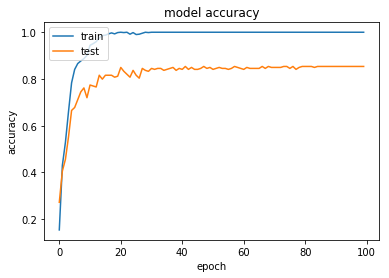

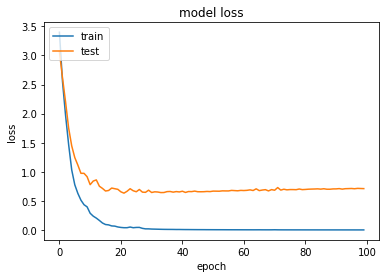

In [65]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Notes
* make sure image set MI caluclations for binary shapes datasets are right it’s doing it for all 955 with 2*2 clusters 
* for 8x8 the filter you have to learn is more complex but eventually it’s more efficient, maybe that’s why loss is less for 2x2 at 15 epochs
* Also more paramters to tune with larger RF size, but same LR and same # of epochs



In [63]:
model = Sequential()
model.add(Conv2D(input_shape = (50,50,1), filters=52, kernel_size = RF_size, strides = stride, activation = 'relu'))
model.add(Flatten())
model.add(Dense(96, activation = 'relu'))
model.add(Dense(39, activation = 'softmax'))
model.compile(optimizer = optimizers.adam(lr = 0.0005), loss = 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x = inputs, validation_split = 0.25, y = labels, batch_size = 50, epochs = 100)


Train on 716 samples, validate on 239 samples
Epoch 1/100
716/716 [==============================] - 5s 7ms/step - loss: 3.3994 - acc: 0.1536 - val_loss: 3.0667 - val_acc: 0.2720
Epoch 2/100
716/716 [==============================] - 2s 3ms/step - loss: 2.5525 - acc: 0.4302 - val_loss: 2.6166 - val_acc: 0.4059
Epoch 3/100
716/716 [==============================] - 2s 3ms/step - loss: 1.9698 - acc: 0.5293 - val_loss: 2.2005 - val_acc: 0.4561
Epoch 4/100
716/716 [==============================] - 2s 3ms/step - loss: 1.4676 - acc: 0.6606 - val_loss: 1.7521 - val_acc: 0.5523
Epoch 5/100
716/716 [==============================] - 2s 3ms/step - loss: 1.0326 - acc: 0.7835 - val_loss: 1.4461 - val_acc: 0.6653
Epoch 6/100
716/716 [==============================] - 2s 3ms/step - loss: 0.7769 - acc: 0.8408 - val_loss: 1.2441 - val_acc: 0.6778
Epoch 7/100
716/716 [==============================] - 2s 3ms/step - loss: 0.6285 - acc: 0.8659 - val_loss: 1.1151 - val_acc: 0.7113
Epoch 8/100
716/716 [==

Epoch 62/100
716/716 [==============================] - 2s 2ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.6816 - val_acc: 0.8494
Epoch 63/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.6897 - val_acc: 0.8452
Epoch 64/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.6787 - val_acc: 0.8452
Epoch 65/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.7076 - val_acc: 0.8452
Epoch 66/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.6768 - val_acc: 0.8452
Epoch 67/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.6867 - val_acc: 0.8536
Epoch 68/100
716/716 [==============================] - 2s 2ms/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.6932 - val_acc: 0.8452
Epoch 69/100
716/716 [==============================] - 2s 2ms